In [7]:
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Set up the WebDriver for Selenium
driver = webdriver.Chrome()

# Step 1: Log in to the website using Selenium
def login_with_selenium():
    driver.get('https://central1.recallmax.com/centralServer/request/admin/public/user/login.html')

    # Find the username and password fields and log in
    username = driver.find_element(By.ID, 'username')
    password = driver.find_element(By.ID, 'password')

    username.send_keys('JeremyBarr')
    password.send_keys('auKYNt5njZgrNHeF')

    # Find and click the login button
    login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
    login_button.click()

    # Wait for login to complete
    time.sleep(5)

# Step 2: Extract cookies and use them in requests
def get_authenticated_session():
    selenium_cookies = driver.get_cookies()
    session = requests.Session()

    # Add Selenium cookies to the requests session
    for cookie in selenium_cookies:
        session.cookies.set(cookie['name'], cookie['value'])

    return session

# Step 3: Fetch all survey responses for a specific year
def get_survey_responses(session, year):
    url = "https://can5.recallmax.com/rsm/request/dash/secure/survey/surveyResponsesTable"
    params = {
        "accountId": 67640,
        "period": year,
        "_": 1728360203212
    }
    
    response = session.get(url, params=params)
    
    if response.status_code == 200:
        try:
            return response.json().get("data", [])  # Return survey data if the response is valid
        except ValueError:
            print(f"Failed to parse JSON response for year {year}.")
            return []
    else:
        print(f"Failed to fetch survey responses for year {year}. Status code: {response.status_code}")
        return []

# Step 4: Fetch survey details for each survey
def get_survey_details(session, survey_id):
    url = "https://can5.recallmax.com/rsm/request/dash/secure/survey/surveyResponseDetails"
    params = {
        "accountId": 67640,
        "surveyId": survey_id
    }
    
    response = session.get(url, params=params)
    
    if response.status_code == 200:
        try:
            return response.json()  # Return survey details
        except ValueError:
            print(f"Failed to parse survey details for survey ID {survey_id}.")
            return {}
    else:
        print(f"Failed to fetch details for survey ID {survey_id}. Status code: {response.status_code}")
        return {}

# Step 5: Scrape and save all survey data to CSV for the years 2019 to 2024
def scrape_surveys_to_csv():
    login_with_selenium()  # Step 1: Log in using Selenium
    session = get_authenticated_session()  # Step 2: Get authenticated session
    
    all_survey_data = []  # List to store all survey data

    # Step 3: Loop through the years from 2019 to 2024
    for year in range(2019, 2025):
        print(f"Fetching survey responses for year: {year}")
        survey_responses = get_survey_responses(session, year)
        
        if not survey_responses:
            print(f"No survey responses found for year {year}.")
            continue
        
        # Step 4: Loop through each survey response and get details
        for survey in survey_responses:
            survey_id = survey.get("surveyId")
            if survey_id:
                print(f"Fetching details for Survey ID: {survey_id} in year {year}")
                survey_details = get_survey_details(session, survey_id)
                if survey_details:
                    # Merge survey summary and details for CSV export
                    survey_data = {**survey, **survey_details, "year": year}  # Include the year in the data
                    all_survey_data.append(survey_data)

    # Step 5: Save to CSV using pandas
    df = pd.DataFrame(all_survey_data)
    df.to_csv("survey_data_2019_2024.csv", index=False)
    print("All survey data has been saved to survey_data_2019_2024.csv.")

# Run the scraping process
if __name__ == "__main__":
    scrape_surveys_to_csv()

    # Close the Selenium browser when done
    driver.quit()


Fetching survey responses for year: 2019
Fetching details for Survey ID: 77173 in year 2019
Fetching details for Survey ID: 69719 in year 2019
Fetching details for Survey ID: 69867 in year 2019
Fetching details for Survey ID: 69734 in year 2019
Fetching details for Survey ID: 71694 in year 2019
Fetching details for Survey ID: 71506 in year 2019
Fetching details for Survey ID: 70548 in year 2019
Fetching details for Survey ID: 71002 in year 2019
Fetching details for Survey ID: 70842 in year 2019
Fetching details for Survey ID: 71265 in year 2019
Fetching details for Survey ID: 69571 in year 2019
Fetching details for Survey ID: 69572 in year 2019
Fetching details for Survey ID: 71662 in year 2019
Fetching details for Survey ID: 70114 in year 2019
Fetching details for Survey ID: 70287 in year 2019
Fetching details for Survey ID: 70630 in year 2019
Fetching details for Survey ID: 70444 in year 2019
Fetching details for Survey ID: 70224 in year 2019
Fetching details for Survey ID: 75149 in 

In [24]:
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Set up the WebDriver for Selenium
driver = webdriver.Chrome()

# Step 1: Log in to the website using Selenium
def login_with_selenium():
    driver.get('https://central1.recallmax.com/centralServer/request/admin/public/user/login.html')

    # Find the username and password fields and log in
    username = driver.find_element(By.ID, 'username')
    password = driver.find_element(By.ID, 'password')

    username.send_keys('JeremyBarr')
    password.send_keys('auKYNt5njZgrNHeF')

    # Find and click the login button
    login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
    login_button.click()

    # Wait for login to complete
    time.sleep(5)

# Step 2: Extract cookies and use them in requests
def get_authenticated_session():
    selenium_cookies = driver.get_cookies()
    session = requests.Session()

    # Add Selenium cookies to the requests session
    for cookie in selenium_cookies:
        session.cookies.set(cookie['name'], cookie['value'])

    return session

# Step 3: Fetch all survey responses for a specific year
def get_survey_responses(session, year):
    url = "https://can5.recallmax.com/rsm/request/dash/secure/survey/surveyResponsesTable"
    params = {
        "accountId": 67640,
        "period": year,
        "_": 1728360203212
    }
    
    response = session.get(url, params=params)
    
    if response.status_code == 200:
        try:
            return response.json().get("data", [])  # Return survey data if the response is valid
        except ValueError:
            print(f"Failed to parse JSON response for year {year}.")
            return []
    else:
        print(f"Failed to fetch survey responses for year {year}. Status code: {response.status_code}")
        return []

# Step 4: Fetch survey details for each survey
def get_survey_details(session, survey_id):
    url = "https://can5.recallmax.com/rsm/request/dash/secure/survey/surveyResponseDetails"
    params = {
        "accountId": 67640,
        "surveyId": survey_id
    }
    
    response = session.get(url, params=params)
    
    if response.status_code == 200:
        try:
            return response.json()  # Return survey details
        except ValueError:
            print(f"Failed to parse survey details for survey ID {survey_id}.")
            return {}
    else:
        print(f"Failed to fetch details for survey ID {survey_id}. Status code: {response.status_code}")
        return {}

# Step 5: Scrape and save all survey data to CSV for the years 2019 to 2024
def scrape_surveys_to_csv():
    login_with_selenium()  # Step 1: Log in using Selenium
    session = get_authenticated_session()  # Step 2: Get authenticated session
    
    all_survey_data = []  # List to store all survey data

    # Step 3: Loop through the years from 2019 to 2024
    for year in range(2019, 2025):
        print(f"Fetching survey responses for year: {year}")
        survey_responses = get_survey_responses(session, year)
        
        if not survey_responses:
            print(f"No survey responses found for year {year}.")
            continue
        
        # Step 4: Loop through each survey response and get details
        for survey in survey_responses:
            survey_id = survey.get("surveyId")
            if survey_id:
                print(f"Fetching details for Survey ID: {survey_id} in year {year}")
                survey_details = get_survey_details(session, survey_id)
                if survey_details:
                    # Merge survey summary and details for CSV export
                    survey_data = {**survey, **survey_details, "year": year}  # Include the year in the data
                    all_survey_data.append(survey_data)

    # Step 5: Save to CSV using pandas
    df = pd.DataFrame(all_survey_data)
    df.to_csv("survey_data_2019_2024.csv", index=False)
    print("All survey data has been saved to survey_data_2019_2024.csv.")

# Run the scraping process
if __name__ == "__main__":
    scrape_surveys_to_csv()

    # Close the Selenium browser when done
    driver.quit()


Fetching survey responses for year: 2019
Fetching details for Survey ID: 77173 in year 2019
Fetching details for Survey ID: 69719 in year 2019
Fetching details for Survey ID: 69867 in year 2019
Fetching details for Survey ID: 69734 in year 2019
Fetching details for Survey ID: 71694 in year 2019
Fetching details for Survey ID: 71506 in year 2019
Fetching details for Survey ID: 70548 in year 2019
Fetching details for Survey ID: 71002 in year 2019
Fetching details for Survey ID: 70842 in year 2019
Fetching details for Survey ID: 71265 in year 2019
Fetching details for Survey ID: 69571 in year 2019
Fetching details for Survey ID: 69572 in year 2019
Fetching details for Survey ID: 71662 in year 2019
Fetching details for Survey ID: 70114 in year 2019
Fetching details for Survey ID: 70287 in year 2019
Fetching details for Survey ID: 70630 in year 2019
Fetching details for Survey ID: 70444 in year 2019
Fetching details for Survey ID: 70224 in year 2019
Fetching details for Survey ID: 75149 in 

In [6]:
import pandas as pd

# Load the survey data
data = pd.read_csv("survey_data_2019_2024.csv")

# Display the first few rows of the dataset
print(data.head())


   contacted  ratingRaw  surveyId  unread apptDateRaw           name  \
0      False   9.571429     77173   False  2019-10-23   James Rooney   
1      False   7.833333     69719   False  2019-08-16      Liz Brunt   
2      False  10.000000     69867   False  2019-08-19  Colin Burwell   
3      False   6.714286     69734   False  2019-08-16  George Pithie   
4      False   8.000000     71694   False  2019-09-06    Robert Amos   

      rating  comment    apptDate apptProv                    email  \
0   9.571429     True  2019-10-23  ['N/A']   irishmethods@gmail.com   
1   7.833333    False  2019-08-16  ['N/A']        rlb003@rogers.com   
2  10.000000     True  2019-08-19  ['N/A']  colinrburwell@gmail.com   
3   6.714286    False  2019-08-16  ['N/A']     grpithie@hotmail.com   
4   8.000000    False  2019-09-06  ['N/A']         rlmlamos@msn.com   

                                           emailHref    respDate  \
0  mailto:irishmethods@gmail.com?subject=RE:%20Su...  2019-10-24   
1  m

In [8]:
# Check the data types and column names
print(data.info())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   contacted                 1532 non-null   bool   
 1   ratingRaw                 1532 non-null   float64
 2   surveyId                  1532 non-null   int64  
 3   unread                    1532 non-null   bool   
 4   apptDateRaw               1530 non-null   object 
 5   name                      1532 non-null   object 
 6   rating                    1531 non-null   float64
 7   comment                   1532 non-null   bool   
 8   apptDate                  1530 non-null   object 
 9   apptProv                  1532 non-null   object 
 10  email                     1191 non-null   object 
 11  emailHref                 1468 non-null   object 
 12  respDate                  1532 non-null   object 
 13  patientContacted          1532 non-null   int64  
 14  question

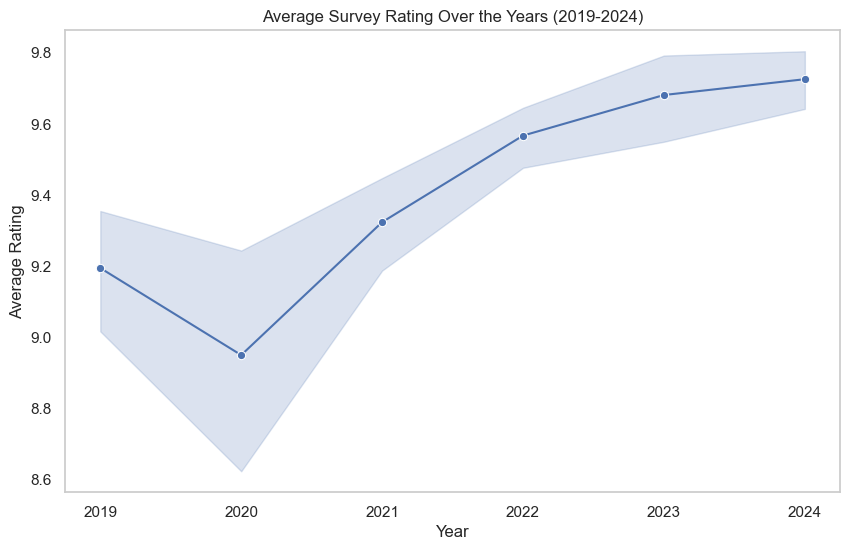

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='avgRating', estimator='mean', marker='o')
plt.title('Average Survey Rating Over the Years (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(data['year'].unique())  # Ensure all years are shown on x-axis
plt.grid()
plt.show()


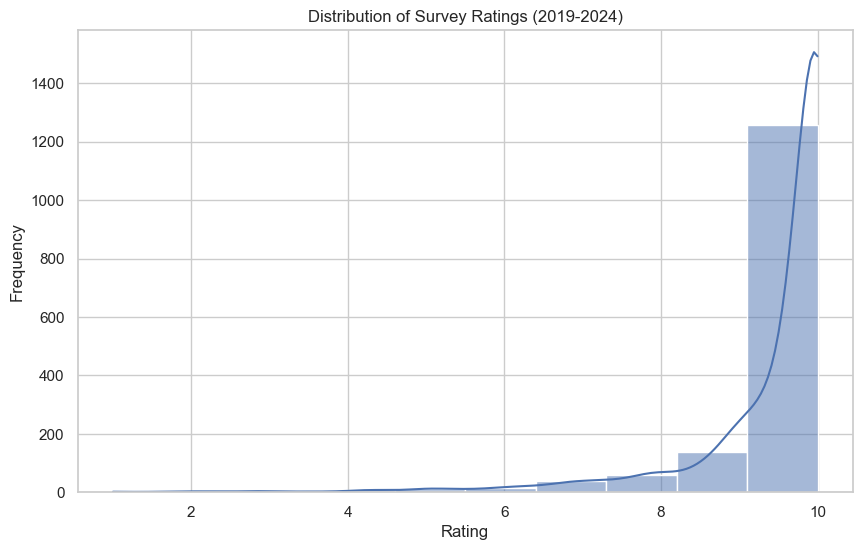

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribution of Survey Ratings (2019-2024)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


/var/folders/fp/hhn7s8v11t38d1j_yr3spp940000gn/T/ipykernel_46711/3736079613.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='year', y='avgRating', estimator='mean', ci=None)


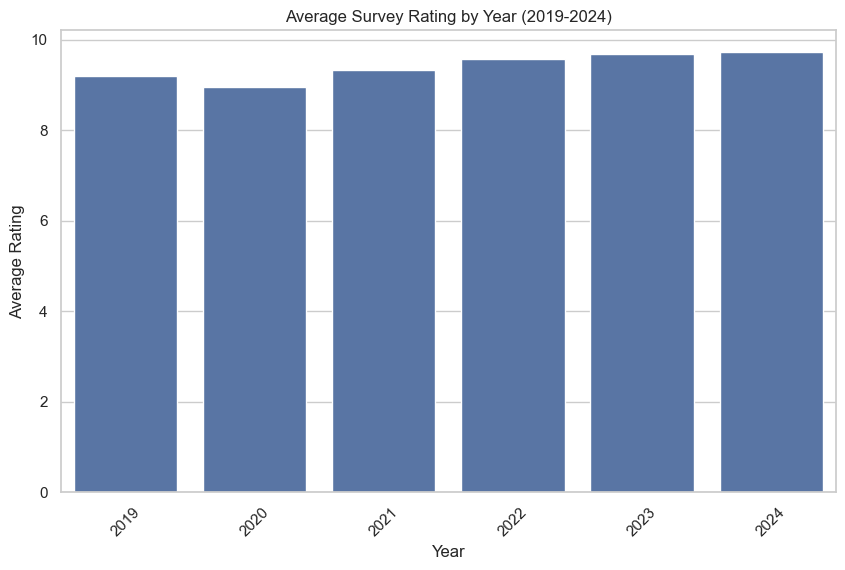

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='year', y='avgRating', estimator='mean', ci=None)
plt.title('Average Survey Rating by Year (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()
